그리드맵 생성 중...
성공: 이미지 크기가 목표 크기 (270, 236)와 일치합니다.
그리드맵을 .npy 파일로 저장하는 중...


C:\Users\khg95\AppData\Local\Temp\ipykernel_7916\1038815261.py:37: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)


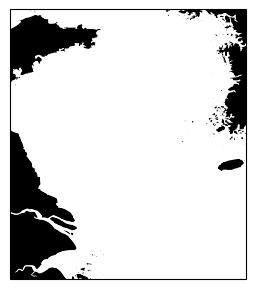

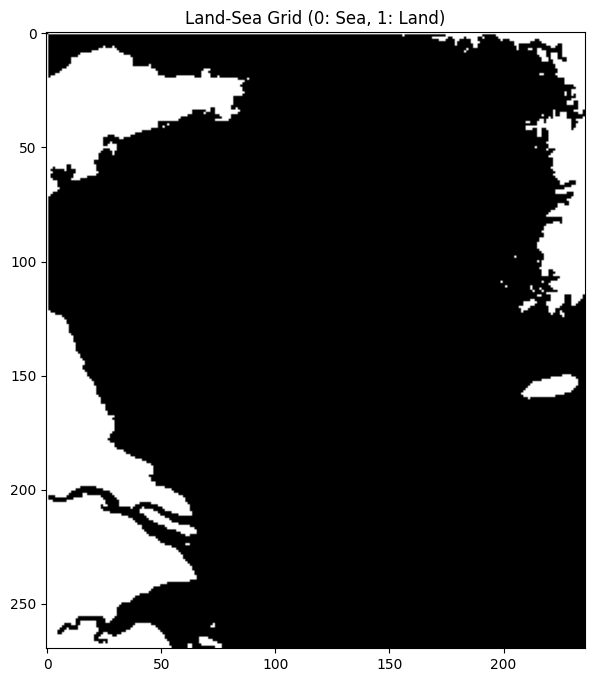

작업 완료! 'land_sea_grid_cartopy.npy' 파일이 생성되었습니다.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# 1. 그리드 파라미터 정의
lon_min, lon_max = 120, 127  # 경도 범위 (120~127°E)
lat_min, lat_max = 30, 38    # 위도 범위 (30~38°N)
n_cols = 236                 # 가로 픽셀 수 (경도 방향)
n_rows = 270                 # 세로 픽셀 수 (위도 방향)

# 2. DPI와 figsize 설정 (정확한 픽셀 크기 보장)
dpi = 100                    # DPI 설정
fig_width = n_cols / dpi     # 가로 크기 (인치 단위)
fig_height = n_rows / dpi    # 세로 크기 (인치 단위)

# 3. Cartopy로 지도 생성
fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 4. 육지와 바다 추가
ax.add_feature(cfeature.LAND, facecolor='black', edgecolor='none')  # 육지 = 검정
ax.add_feature(cfeature.OCEAN, facecolor='white', edgecolor='none') # 바다 = 흰색

# 5. 여백 완전 제거
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 여백을 0으로 설정
ax.set_position([0, 0, 1, 1])  # 축을 캔버스 전체에 꽉 채움

# 6. 캔버스에서 픽셀 데이터로 변환
canvas = FigureCanvas(fig)
canvas.draw()  # 캔버스에 그리기

# 7. 픽셀 데이터를 NumPy 배열로 가져오기
print("그리드맵 생성 중...")
img_data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
img_data = img_data.reshape(canvas.get_width_height()[::-1] + (3,))  # RGB 배열로 변환

# 8. 흑백으로 변환 (육지=1, 바다=0)
grid = (img_data[:, :, 0] == 0).astype(np.uint8)  # 검정이면 1(육지), 흰색이면 0(바다)

# 9. 크기 확인
if grid.shape != (n_rows, n_cols):
    print(f"오류: 이미지 크기 {grid.shape}가 목표 크기 {(n_rows, n_cols)}와 다릅니다.")
    raise ValueError("캔버스 크기가 목표 크기와 일치하지 않습니다. DPI를 조정하세요.")
else:
    print(f"성공: 이미지 크기가 목표 크기 {(n_rows, n_cols)}와 일치합니다.")

# 10. .npy 파일로 저장
print("그리드맵을 .npy 파일로 저장하는 중...")
np.save('land_sea_grid_cartopy_downsized.npy', grid)

# 11. 결과 확인 (선택 사항)
plt.figure(figsize=(10, 8))
plt.imshow(grid, cmap='gray', origin='upper')
plt.title('Land-Sea Grid (0: Sea, 1: Land)')
plt.show()

print("작업 완료! 'land_sea_grid_cartopy.npy' 파일이 생성되었습니다.")

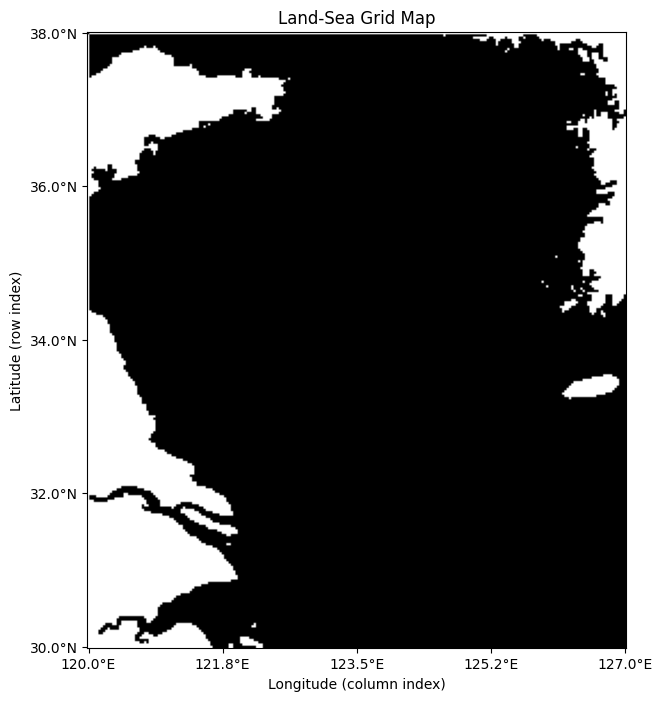

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. .npy 파일 로드
grid = np.load('land_sea_grid_cartopy_downsized.npy')  # 파일 이름은 실제 파일 이름으로 바꿔줘

# 2. 그리드 데이터 시각화
plt.figure(figsize=(10, 8))  # 그림 크기 설정
plt.imshow(grid, cmap='gray', origin='upper')  # 상단부터 시작하도록 설정
plt.title('Land-Sea Grid Map')  # 제목 추가
plt.xlabel('Longitude (column index)')  # x축 레이블
plt.ylabel('Latitude (row index)')  # y축 레이블

# 가정: 위도 38°N ~ 30°N (810행), 경도 120°E ~ 127°E (710열)
n_rows, n_cols = grid.shape
lon_min, lon_max = 120, 127
lat_max, lat_min = 38, 30

# 경도 ticks
lon_ticks = np.linspace(0, n_cols-1, 5)
lon_labels = np.linspace(lon_min, lon_max, 5)
plt.xticks(lon_ticks, [f"{lon:.1f}°E" for lon in lon_labels])

# 위도 ticks
lat_ticks = np.linspace(0, n_rows-1, 5)
lat_labels = np.linspace(lat_max, lat_min, 5)
plt.yticks(lat_ticks, [f"{lat:.1f}°N" for lat in lat_labels])

# 4. 그래프 표시
plt.show()